# Практична робота №3
**Тема:** Кластеризація

## Мета роботи
Закріпити поняття про основні алгоритми кластеризації в машинному навчанні.

Завдання:

1.	Виконати кластеризацію для набору даних iris різними методами для визначення сорту ірисів та порівняти якість моделей.

Можна використовувати реальний набір даних для кластеризації методом k-means++. Один із популярних реальних наборів даних, доступний у бібліотеці scikit-learn, — це Iris dataset, який містить дані про різні види квітів Iris.




**Крок 1.** Імпортуйте необхідні бібліотеки

In [ ]:
# Робота з даними
import pandas as pd
import numpy as np

# Візуалізація
import matplotlib.pyplot as plt
import seaborn as sns

# Кластеризація
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Для зменшення розмірності (щоб візуалізувати кластери у 2D)
from sklearn.decomposition import PCA

**Крок 2**. Завантажте дані. Це класичний набір даних, який містить характеристики квіток трьох видів

150 рядків, 5 колонок (4 ознаки + species).

Ознаки:

sepal length (довжина чашолистка)

sepal width (ширина чашолистка)

petal length (довжина пелюстки)

petal width (ширина пелюстки)

species: три класи — setosa, versicolor, virginica (по 50 прикладів кожного).

In [ ]:
# Завантажуємо датасет Iris

iris = load_iris()

# Перетворюємо у DataFrame для зручності
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Додаємо колонку з реальними класами (для перевірки, але у кластеризації ми її не використовуємо)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Перевірка
print(df.shape)       # розмір таблиці
print(df.head())      # перші рядки
print(df['species'].value_counts())  # баланс класів

(150, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


**Крок 3.** Кластеризація методом K‑Means

Для кластеризації ми використовуємо лише числові ознаки (без колонки species).

In [ ]:
X = df.drop(columns=['species'])


# Створюємо модель KMeans з 3 кластерами (бо відомо, що є 3 види Iris)
kmeans = KMeans(n_clusters=3, random_state=42)

# Навчаємо модель
kmeans.fit(X)

# Отримуємо передбачені кластери
df['kmeans_cluster'] = kmeans.labels_

print(df['kmeans_cluster'].value_counts())


kmeans_cluster
2    61
1    50
0    39
Name: count, dtype: int64


**Інтерпретація**

Алгоритм K‑Means розділив 150 квіток Iris на 3 кластери (0, 1, 2).

Номери кластерів (0, 1, 2) — це просто умовні мітки, які призначає алгоритм. Вони не збігаються напряму з реальними видами (setosa, versicolor, virginica).

Кількість об’єктів у кожному кластері:

Cluster 2 → 61 квітка

Cluster 1 → 50 квіток

Cluster 0 → 39 квіток

**Крок 4. Візуалізація результатів**

Щоб побачити кластери у 2D, зменшимо розмірність даних через PCA.Що таке PCA?

Ідея

У багатовимірних даних (наприклад, Iris має 4 ознаки: довжина та ширина чашолистка і пелюстки) важко побачити структуру.PCA зменшує кількість вимірів, але зберігає якомога більше інформації.Він шукає нові "головні осі" (компоненти), які пояснюють найбільшу частину варіації даних.

Уявімо, що маємо дані про квітки з двома ознаками:

Довжина пелюстки

Ширина пелюстки

Flower	Petal Length	Petal Width

A	      1.0	          0.2

B	      1.2	          0.3

C	      4.5	          1.5

D	      4.7	          1.4

Кроки PCA

Дані мають дві ознаки, але вони сильно корельовані (довша пелюстка → ширша).

PCA знайде нову вісь, яка йде вздовж напрямку найбільшої варіації (довжина ≈ ширина).

Перша головна компонента пояснює ~95% варіації (різниця між маленькими й великими квітками).

Друга компонента пояснює лише ~5% (невеликі відхилення ширини).

Таким чином, замість двох ознак ми можемо залишити одну — PC1, яка майже повністю відділяє маленькі квітки від великих.

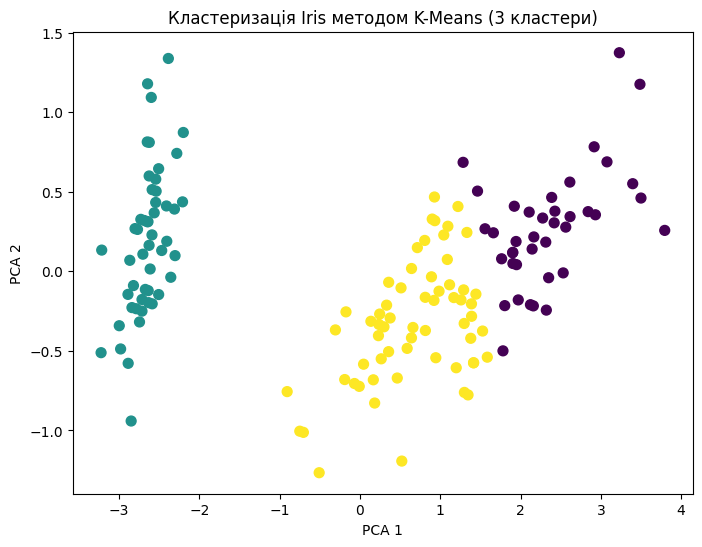

In [ ]:
from sklearn.decomposition import PCA
# Зменшення розмірності до 2 компонент
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Візуалізація трьох кластерів
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],
            c=df['kmeans_cluster'],   # колір = кластер
            cmap='viridis',           # палітра кольорів
            s=50)

plt.title("Кластеризація Iris методом K-Means (3 кластери)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

**Крок 5** Оцінка якості кластеризації

У випадку звичайної кластеризації ми не маємо «правильних» міток (класи не використовуються при навчанні), тому якість моделі оможна оцінити через

Silhouette Score. Показує, наскільки добре об’єкти «схожі» на свій кластер і «відрізняються» від інших. Значення від -1 до 1 (чим ближче до 1 — тим краще).

У Iris ми знаємо реальні види квітів (setosa, versicolor, virginica), тому можемо порівняти кластери з ними:

Adjusted Rand Index (ARI) Порівнює кластеризацію з реальними класами, враховуючи випадкові збіги.



In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Внутрішня метрика
sil_score = silhouette_score(X, df['kmeans_cluster'])
print("Silhouette Score:", sil_score)

# Зовнішня метрика (бо у Iris є справжні класи)
ari_score = adjusted_rand_score(df['species'], df['kmeans_cluster'])
print("Adjusted Rand Index:", ari_score)

Silhouette Score: 0.551191604619592
Adjusted Rand Index: 0.7163421126838476


**Крок 6. Ієрархічна кластеризація (Agglomerative Clustering)**
Побудуємо ту ж саму кластеризацію іншим методом.

Алгоритм поступово об’єднує найближчі точки у групи.

Спочатку кожна точка — окремий кластер.

Потім кластери зливаються один з одним, доки не утвориться потрібна кількість груп.

Результат можна показати у вигляді дендрограми (дерева злиття кластерів).


In [ ]:
# Використовуємо ті самі дані (без species)
X = df.drop(columns=['species'])

# Створюємо модель ієрархічної кластеризації
agg = AgglomerativeClustering(n_clusters=3)

# Навчаємо модель
df['agg_cluster'] = agg.fit_predict(X)

print(df['agg_cluster'].value_counts())

agg_cluster
0    61
1    50
2    39
Name: count, dtype: int64


Зробіть інтерпретацію результатів моделювання самостійно:


**Крок 6**.Візуалізуємо ці кластери

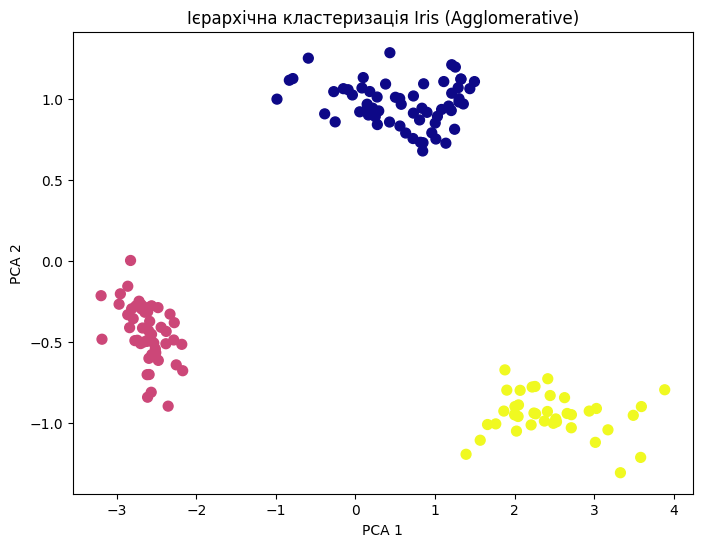

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1],
            c=df['agg_cluster'], cmap='plasma', s=50)
plt.title("Ієрархічна кластеризація Iris (Agglomerative)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

**Крок 7** *Розрахуємо* оцінки якості моделі

In [ ]:
# Внутрішня метрика
sil_score = silhouette_score(X, df['agg_cluster'])
print("Silhouette Score:", sil_score)

# Зовнішня метрика (бо у Iris є справжні класи)
ari_score = adjusted_rand_score(df['species'], df['agg_cluster'])
print("Adjusted Rand Index:", ari_score)

Silhouette Score: 0.68468524942902
Adjusted Rand Index: 0.7163421126838476


**Крок 8** Побудуємо дендрограму для ієрархічної класифікації

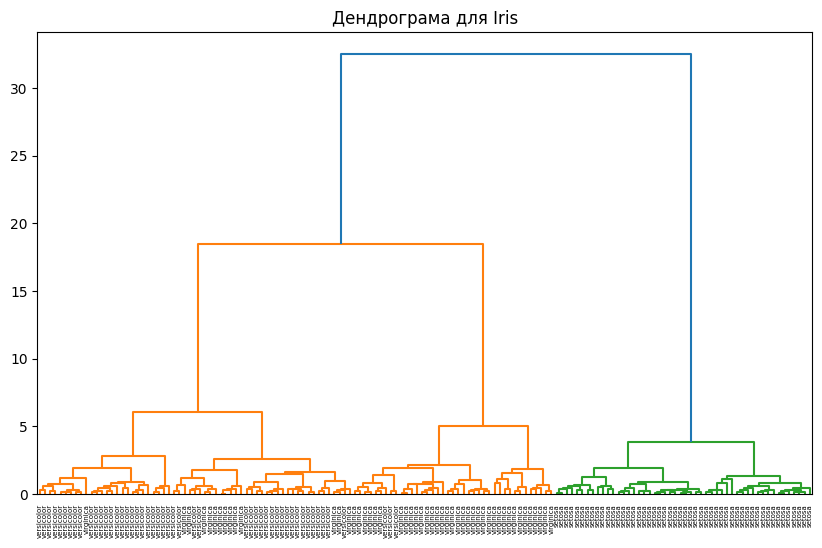

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X, method='ward')  # Ward мінімізує дисперсію всередині кластерів
plt.figure(figsize=(10,6))
dendrogram(linked,
           orientation='top',
           labels=df['species'].values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Дендрограма для Iris")
plt.show()

**Завдання для самостійного виконання**

Частина 1. Кластеризація методом DBSCAN

Виконайте кластеризацію датасету Iris за допомогою алгоритму DBSCAN.

Використайте параметри eps та min_samples.

Поясніть, як вони впливають на кількість кластерів і виділення «шуму».

Візуалізуйте результат у 2D (через PCA).

Позначте кластери різними кольорами.

Відмітьте точки, які DBSCAN класифікував як «шум» (label = -1).

Частина 2. Порівняння з іншими методами

Порівняйте результати DBSCAN з K‑Means та AgglomerativeClustering:

Скільки кластерів знайшов кожен метод?

Чи є точки, які DBSCAN вважає шумом, але інші методи віднесли до кластерів?

Обчисліть метрики якості:

Silhouette Score для кожного методу.

Якщо хочете — порівняйте з реальними класами через Adjusted Rand Index (ARI)

In [ ]:
#Тут має бути Ваш код


Тут мають бути Ваші висновки